# [모듈 1.1] 데이터 세트 및 탐색

---

In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np

pd.options.display.max_columns=30


import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

data_dir = '../data'
# df_claims = pd.read_csv(f"{data_dir}/claims_preprocessed.csv", index_col=0)
# df_customers = pd.read_csv(f"{data_dir}/customers_preprocessed.csv", index_col=0)

In [67]:
claims_df = pd.read_csv(f"{data_dir}/claims.csv", index_col=0)
customers_df = pd.read_csv(f"{data_dir}/customers.csv", index_col=0)


## Claim 데이터 세트

In [68]:
from IPython.display import display as dp
dp(claims_df)

,driver_relationship,incident_type,collision_type,incident_severity,authorities_contacted,num_vehicles_involved,num_injuries,num_witnesses,police_report_available,injury_claim,vehicle_claim,total_claim_amount,incident_month,incident_day,incident_dow,incident_hour,fraud
policy_id,,,,,,,,,,,,,,,,,
1,Spouse,Collision,Front,Minor,None,2,0,0,No,71600,8913.668763,80513.668763,3,17,6,8,0
2,Self,Collision,Rear,Totaled,Police,3,4,0,Yes,6400,19746.724395,26146.724395,12,11,2,11,0
3,Self,Collision,Front,Minor,Police,2,0,1,Yes,10400,11652.969918,22052.969918,12,24,1,14,0
4,Child,Collision,Side,Minor,None,2,0,0,No,104700,11260.930936,115960.930936,12,23,0,19,0
5,Self,Collision,Side,Major,Police,2,1,0,No,3400,27987.704652,31387.704652,5,8,2,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,Self,Collision,Front,Minor,None,2,0,3,No,15700,1494.409549,17194.409549,8,7,2,5,1
4997,Self,Collision,Side,Minor,None,2,0,1,No,34900,14837.909976,49737.909976,1,10,3,13,0
4998,Self,Collision,Front,Minor,None,1,0,0,No,11700,12421.253027,24121.253027,6,3,0,7,0


In [69]:
claims_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   driver_relationship      4272 non-null   object 
 1   incident_type            5000 non-null   object 
 2   collision_type           4272 non-null   object 
 3   incident_severity        5000 non-null   object 
 4   authorities_contacted    5000 non-null   object 
 5   num_vehicles_involved    5000 non-null   int64  
 6   num_injuries             5000 non-null   int64  
 7   num_witnesses            5000 non-null   int64  
 8   police_report_available  5000 non-null   object 
 9   injury_claim             5000 non-null   int64  
 10  vehicle_claim            5000 non-null   float64
 11  total_claim_amount       5000 non-null   float64
 12  incident_month           5000 non-null   int64  
 13  incident_day             5000 non-null   int64  
 14  incident_dow            

array([<AxesSubplot:title={'center':'fraud'}>], dtype=object)

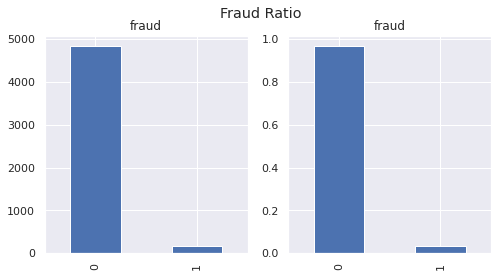

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
claims_df.fraud.value_counts().plot(kind='bar', ax=axes[0], title="Fraud Ratio", subplots=True)
claims_df.fraud.value_counts(normalize=True).plot(kind='bar', ax=axes[1], subplots=True)

## Customer 데이터 세트

In [70]:
dp(customers_df)

,customer_age,months_as_customer,num_claims_past_year,num_insurers_past_5_years,policy_state,policy_deductable,policy_annual_premium,policy_liability,customer_zip,customer_gender,customer_education,auto_year
policy_id,,,,,,,,,,,,
1,54,94,0,1,WA,750,3000,25/50,99207,Unkown,Associate,2006
2,41,165,0,1,CA,750,2950,15/30,95632,Male,Bachelor,2012
3,57,155,0,1,CA,750,3000,15/30,93203,Female,Bachelor,2017
4,39,80,0,1,AZ,750,3000,30/60,85208,Female,Advanced Degree,2020
5,39,60,0,1,CA,750,3000,15/30,91792,Female,High School,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
4996,33,4,0,3,CA,750,2550,25/50,92028,Male,Associate,2015
4997,45,150,0,1,NV,750,3000,30/60,89178,Female,Bachelor,2015
4998,28,87,0,1,CA,750,2950,25/50,91702,Male,High School,2016


In [71]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   customer_age               5000 non-null   int64 
 1   months_as_customer         5000 non-null   int64 
 2   num_claims_past_year       5000 non-null   int64 
 3   num_insurers_past_5_years  5000 non-null   int64 
 4   policy_state               5000 non-null   object
 5   policy_deductable          5000 non-null   int64 
 6   policy_annual_premium      5000 non-null   int64 
 7   policy_liability           5000 non-null   object
 8   customer_zip               5000 non-null   int64 
 9   customer_gender            5000 non-null   object
 10  customer_education         5000 non-null   object
 11  auto_year                  5000 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 507.8+ KB
